# Réseau de neurones avec TensorFlow

In [1]:
# Charger les packages nécessaires

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Importer le jeu de données

news = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [3]:
news.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [14]:
# Séparer les features et la target

X, y = news['data'], news['target']

y = y.astype(np.uint8)

In [15]:
print(X[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [10]:
# Séparer le jeu de données en jeu d'apprentissage et de test non aléatoire avec 10% de test

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)

In [11]:
# Utiliser un Tokenizer pour encoder le texte

vocab_size = 15000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
 
X_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')

In [12]:
print(X_train[0])

[0.         2.19385092 0.         ... 0.         0.         0.        ]


In [8]:
# Création du modèle

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(vocab_size,)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(20, activation='softmax'))
model.summary()
 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7680512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1

In [9]:
# Entrainement du modèle

model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
319/319 [==============================] - 10s 29ms/step - loss: 2.1167 - accuracy: 0.4111 - val_loss: 1.0172 - val_accuracy: 0.6988
Epoch 2/5
319/319 [==============================] - 8s 26ms/step - loss: 0.5694 - accuracy: 0.8841 - val_loss: 1.2308 - val_accuracy: 0.6996
Epoch 3/5
319/319 [==============================] - 9s 27ms/step - loss: 0.4269 - accuracy: 0.9382 - val_loss: 1.3975 - val_accuracy: 0.6811
Epoch 4/5
319/319 [==============================] - 9s 27ms/step - loss: 0.2897 - accuracy: 0.9437 - val_loss: 4.1697 - val_accuracy: 0.6873
Epoch 5/5
319/319 [==============================] - 8s 26ms/step - loss: 0.8282 - accuracy: 0.9584 - val_loss: 1.5902 - val_accuracy: 0.6714


In [10]:
#Prédire les valeurs de test

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

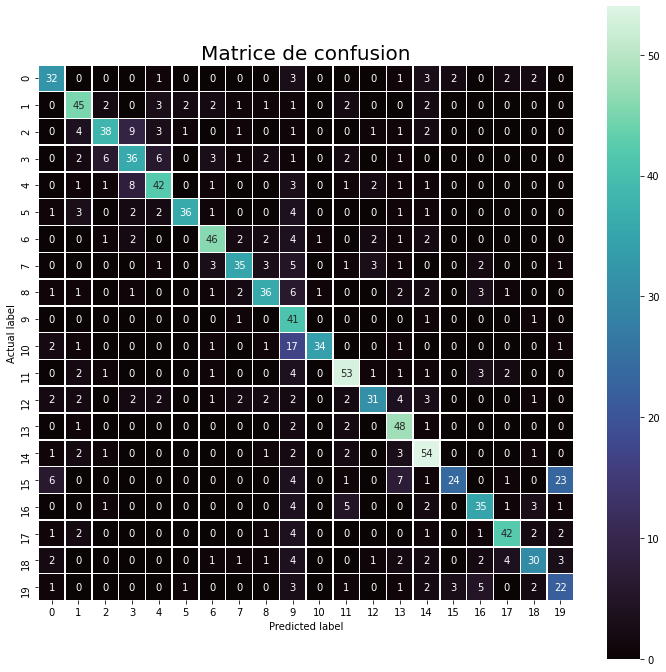

In [11]:
#Afficher la matrice de confusion

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Matrice de confusion", size = 20)
plt.show()

In [12]:
# Sauvegarder le modèle pour pouvoir le réutiliser plus tard

model.save('20news_model')

INFO:tensorflow:Assets written to: 20news_model\assets
